# Analisis Data Jumlah Sepeda Harian di Jembatan Kota New York

## Gambaran Umum

Dalam notebook ini, kita akan melakukan analisis terhadap dataset yang berisi data harian jumlah sepeda yang melewati beberapa jembatan di New York City. [Dataset](https://www.kaggle.com/datasets/new-york-city/nyc-east-river-bicycle-crossings) disediakan oleh Departemen Transportasi Kota New York (NYC DOT) dan mencakup informasi mengenai suhu harian, curah hujan, serta jumlah sepeda yang melewati empat jembatan utama: Brooklyn Bridge, Manhattan Bridge, Williamsburg Bridge, dan Queensboro Bridge. 

## Langkah-langkah yang akan dilakukan:

1. **Memuat dan Membersihkan Data:**
   - Memuat dataset dari file CSV.
   - Mengonversi kolom tanggal menjadi format datetime.
   - Membersihkan data pada kolom curah hujan yang memiliki nilai khusus seperti 'T' dan '0.47 (S)'.

2. **Pemahaman Data Awal:**
   - Menampilkan beberapa baris awal dataset untuk memahami struktur dan isi data.
   - Menghitung statistik deskriptif untuk setiap kolom.

3. **Analisis Total Jumlah Sepeda:**
   - Membuat visualisasi total jumlah sepeda yang melewati jembatan.

4. **Analisis Jumlah Sepeda Harian:**
   - Membuat visualisasi jumlah sepeda harian yang melewati setiap jembatan.
   - Mengidentifikasi tren harian dalam jumlah sepeda.

5. **Analisis Pengaruh Cuaca:**
   - Menganalisis bagaimana suhu tertinggi, suhu terendah, dan curah hujan mempengaruhi jumlah sepeda yang melewati jembatan.
   - Membuat model regresi Poisson untuk memprediksi jumlah sepeda berdasarkan variabel cuaca.

6. **Visualisasi Prediksi Model:**
   - Membandingkan jumlah sepeda observasi dengan jumlah sepeda prediksi dari model regresi Poisson.
   - Menampilkan kurva prediksi untuk memberikan gambaran tren data.

7. **Kesimpulan:**
   - Menyimpulkan temuan utama dari analisis.
   - Mengidentifikasi jembatan dengan jumlah sepeda terbanyak.
   - Menilai pengaruh faktor cuaca terhadap jumlah sepeda harian.

## Tujuan Analisis
- **Memahami Distribusi Jumlah Sepeda:** Mengidentifikasi tren harian dalam jumlah sepeda yang melewati setiap jembatan.
- **Pengaruh Cuaca:** Menganalisis pengaruh suhu dan curah hujan terhadap jumlah sepeda.
- **Identifikasi Jembatan Terpadat:** Menemukan jembatan mana yang memiliki jumlah sepeda terbanyak dan tren penggunaannya.

Notebook ini akan memberikan wawasan mengenai penggunaan sepeda di New York City dan bagaimana faktor cuaca mempengaruhi pola penggunaan sepeda di kota tersebut.


## Proses Analisis

#### [1] Import Library, Dataset & Preprocessing

In [1]:
# Import library yang diperlukan
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat dataset
file_path = 'nyc-east-river-bicycle-counts.csv'
data = pd.read_csv(file_path)

# Membersihkan data
data['Date'] = pd.to_datetime(data['Date'])
data['Precipitation'] = data['Precipitation'].replace({'T': 0, '0.47 (S)': 0.47}).astype(float)

data.head()

,Unnamed: 0,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,0,2016-04-01,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,1,2016-04-02,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2,2016-04-03,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,3,2016-04-04,2016-04-04 00:00:00,44.1,33.1,0.47,521.0,1067,1440.0,1307.0,4335
4,4,2016-04-05,2016-04-05 00:00:00,42.1,26.1,0.00,1416.0,2617,3081.0,2357.0,9471


#### [2] Pemahaman Data (Data Understanding)

##### [2.1] Deskripsi Dataset:

Dataset ini berisi data harian jumlah sepeda yang melewati jembatan-jembatan di New York City, khususnya jembatan yang menghubungkan Manhattan dengan daerah sekitarnya. Data ini dikumpulkan oleh Departemen Transportasi Kota New York (NYC DOT) untuk tujuan perencanaan transportasi.

##### [2.2] Kolom dalam Dataset:

Dataset ini terdiri dari beberapa kolom sebagai berikut:

`Date`: Tanggal data dicatat.

`Day`: Pengulangan dari kolom Date, menyimpan tanggal data dicatat.

`High Temp (°F)`: Suhu tertinggi pada hari tersebut dalam derajat Fahrenheit.

`Low Temp (°F)`: Suhu terendah pada hari tersebut dalam derajat Fahrenheit.

`Precipitation`: Curah hujan pada hari tersebut, dinyatakan dalam inci. Jika curah hujan adalah 'T', artinya jumlahnya sangat kecil hingga diabaikan, sedangkan '0.47 (S)' menunjukkan curah hujan dengan salju.

`Brooklyn Bridge`: Jumlah sepeda yang melewati Jembatan Brooklyn pada hari tersebut.

`Manhattan Bridge`: Jumlah sepeda yang melewati Jembatan Manhattan pada hari tersebut.

`Williamsburg Bridge`: Jumlah sepeda yang melewati Jembatan Williamsburg pada hari tersebut.

`Queensboro Bridge`: Jumlah sepeda yang melewati Jembatan Queensboro pada hari tersebut.

`Total`: Total jumlah sepeda yang melewati semua jembatan pada hari tersebut.

##### [2.3] Analisis Awal:


`Suhu dan Curah Hujan`: Kolom High Temp (°F) dan Low Temp (°F) memberikan informasi tentang suhu tertinggi dan terendah pada hari tersebut.

`Kolom Precipitation` memberikan informasi tentang curah hujan. Nilai 'T' dan '0.47 (S)' perlu dikonversi untuk analisis yang lebih akurat.

`Jumlah Sepeda`: Kolom yang berhubungan dengan jembatan (Brooklyn Bridge, Manhattan Bridge, Williamsburg Bridge, Queensboro Bridge) menunjukkan jumlah sepeda yang melewati setiap jembatan pada hari tersebut.

`Kolom Total` adalah jumlah total sepeda dari semua jembatan tersebut.

`Pengulangan Kolom Date dan Day`: Kolom Day adalah pengulangan dari Date yang mungkin tidak diperlukan dan bisa dihapus untuk penyederhanaan.


#### [3] Analisis Total Sepeda yang Melewati Semua Jembatan

In [44]:
# Memilih fitur yang relevan untuk model
X = data[['High Temp (°F)', 'Low Temp (°F)', 'Precipitation']]
y = data['Total']

# Menambahkan konstanta ke model
X = sm.add_constant(X)

# Menjalankan model regresi Poisson
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Melihat ringkasan model
print(poisson_model.summary())

# Prediksi jumlah sepeda berdasarkan model
data['Predicted Total'] = poisson_model.predict(X)

# Menyimpan hasil ke CSV
data.to_csv('predicted_bike_counts.csv', index=False)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Total   No. Observations:                  210
Model:                            GLM   Df Residuals:                      206
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -76099.
Date:                Fri, 21 Jun 2024   Deviance:                   1.4982e+05
Time:                        17:52:24   Pearson chi2:                 1.43e+05
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.3964      0.004   2265.

---
---

**Penjelasan Hasil Regresi Poisson**

---

**Generalized Linear Model Regression Results**

- `Dep. Variable (Variabel Dependen)`: Total (Jumlah total sepeda yang melewati semua jembatan)
- `No. Observations (Jumlah Observasi)`: 210 (Jumlah hari dalam dataset)

**Model:**

- `Model Family`: Poisson (Karena kita menggunakan regresi Poisson untuk data hitungan)
- `Link Function`: Log (Log-link function adalah default untuk regresi Poisson)
- `Method`: IRLS (Iteratively Reweighted Least Squares, metode yang digunakan untuk estimasi parameter)
- `No. Iterations (Jumlah Iterasi)`: 5 (Jumlah iterasi yang diperlukan untuk konvergensi model)
- `Covariance Type`: nonrobust (Jenis kovariansi yang digunakan dalam estimasi standard error)

**Fit Statistics:**

- `Log-Likelihood`: -76099 (Nilai log-likelihood model)
- `Deviance`: 1.4982e+05 (Deviance adalah ukuran ketidakcocokan model, nilai yang lebih rendah menunjukkan kecocokan yang lebih baik)
- `Pearson chi2`: 1.43e+05 (Chi-squared dari residu Pearson, ukuran lain dari kecocokan model)
- `Pseudo R-squared (CS)`: 1.000 (Ukuran pseudo R-squared menggunakan metode Cox-Snell, menunjukkan model sangat baik dalam menjelaskan variabilitas data)

---
---

**Penjelasan Detail**

---

**const (Konstanta):**

`Koefisien`: 8.3964
- Koefisien konstanta ini merupakan intercept dari model yang mewakili log dari jumlah total sepeda saat semua variabel prediktor bernilai nol.

`Nilai z-score` yang sangat tinggi (2265.587) dan p-value (0.000) menunjukkan bahwa konstanta ini sangat signifikan.

**High Temp (°F) (Suhu Tertinggi):**

`Koefisien`: 0.0244

- Koefisien positif menunjukkan bahwa setiap kenaikan satu derajat Fahrenheit dalam suhu tertinggi harian terkait dengan peningkatan log dari jumlah total sepeda sebesar 0.0244.

`Nilai z-score` yang sangat tinggi (253.205) dan p-value (0.000) menunjukkan bahwa suhu tertinggi sangat signifikan dalam mempengaruhi jumlah total sepeda.

**Low Temp (°F) (Suhu Terendah):**

`Koefisien`: -0.0052

- Koefisien negatif menunjukkan bahwa setiap penurunan satu derajat Fahrenheit dalam suhu terendah harian terkait dengan penurunan log dari jumlah total sepeda sebesar 0.0052.

`Nilai z-score` (-48.165) dan p-value (0.000) menunjukkan bahwa suhu terendah juga sangat signifikan dalam mempengaruhi jumlah total sepeda.

**Precipitation (Curah Hujan):**

`Koefisien`: -2.2184

- Koefisien negatif menunjukkan bahwa setiap peningkatan satu inci dalam curah hujan harian terkait dengan penurunan log dari jumlah total sepeda sebesar 2.2184.

`Nilai z-score` yang sangat tinggi (negatif) (-248.186) dan p-value (0.000) menunjukkan bahwa curah hujan sangat signifikan dalam mempengaruhi jumlah total sepeda.

##### [3.1] Grafik garis jumlah sepeda harian vs. prediksi jumlah sepeda


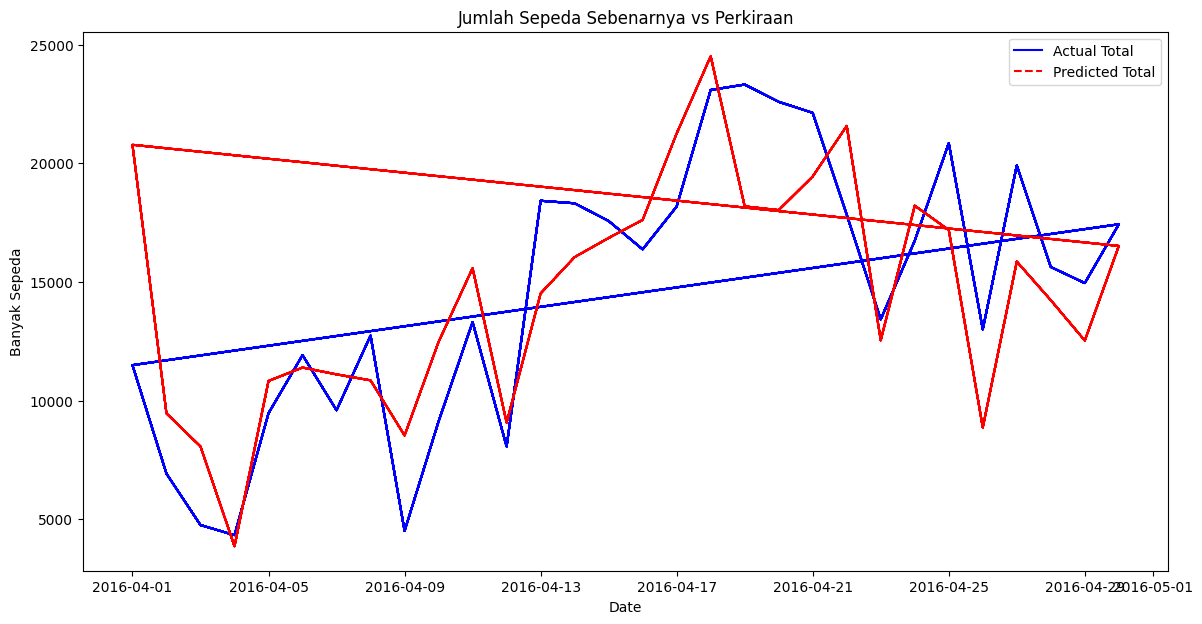

In [45]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Total'], label='Actual Total', color='blue')
plt.plot(data['Date'], data['Predicted Total'], label='Predicted Total', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Banyak Sepeda')
plt.title('Jumlah Sepeda Sebenarnya vs Perkiraan')
plt.legend()
plt.show()

##### [3.2] Scatter plot untuk hubungan antara fitur dan jumlah sepeda

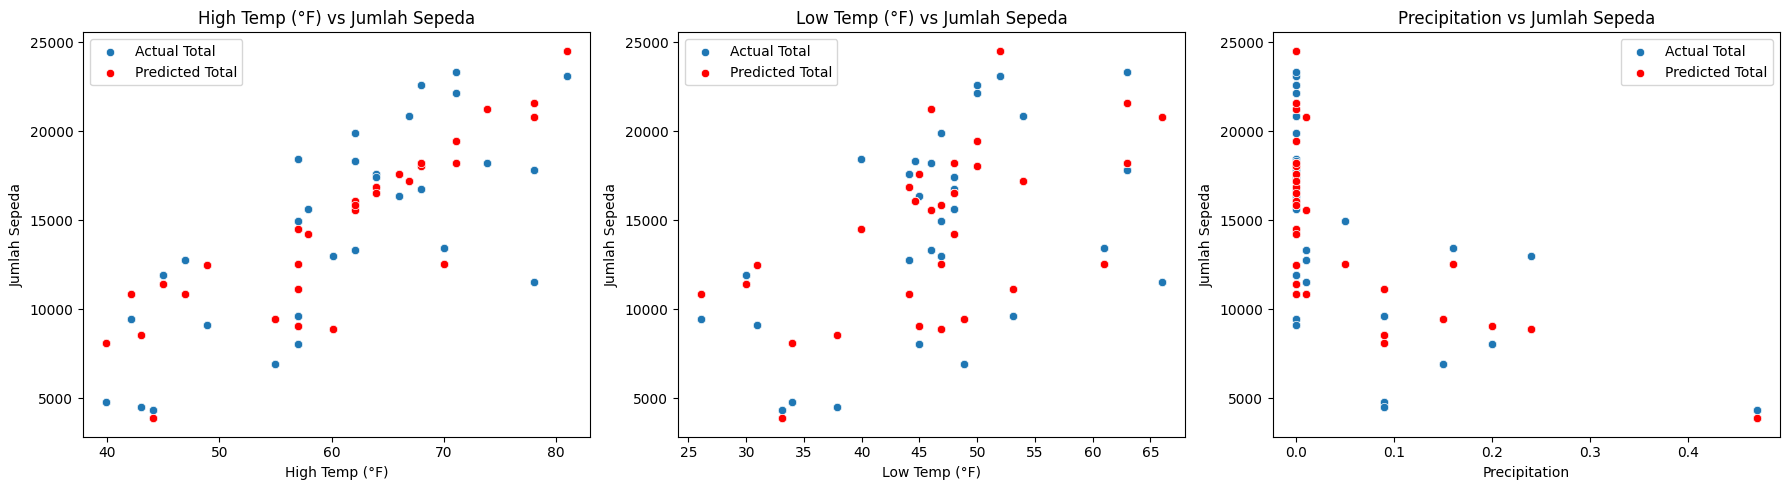

In [46]:
features = ['High Temp (°F)', 'Low Temp (°F)', 'Precipitation']
plt.figure(figsize=(18, 5))
for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=data[feature], y=data['Total'], label='Actual Total')
    sns.scatterplot(x=data[feature], y=data['Predicted Total'], label='Predicted Total', color='red')
    plt.xlabel(feature)
    plt.ylabel('Jumlah Sepeda')
    plt.title(f'{feature} vs Jumlah Sepeda')
    plt.legend()

plt.tight_layout()
plt.show()

#### [4] Analisis Jumlah Sepeda yang Melewati Setiap Jembatan

In [47]:
# Jembatan yang dianalisis
bridges = ['Brooklyn Bridge', 'Manhattan Bridge', 'Williamsburg Bridge', 'Queensboro Bridge']

# Memilih fitur yang relevan untuk model
X = data[['High Temp (°F)', 'Low Temp (°F)', 'Precipitation']]
X = sm.add_constant(X)

# Menjalankan model regresi Poisson untuk setiap jembatan dan memprediksi jumlah sepeda
predicted_columns = []
for bridge in bridges:
    # Target variabel dependen
    y = data[bridge]

    # Menjalankan model regresi Poisson
    poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()
    
    # Melihat ringkasan model (opsional, bisa di-uncomment untuk melihat ringkasan)
    print(bridge)
    print(poisson_model.summary())
    
    # Prediksi jumlah sepeda berdasarkan model
    pred_column = f'Predicted {bridge}'
    data[pred_column] = poisson_model.predict(X)
    predicted_columns.append(pred_column)

# Menyimpan hasil ke CSV
data.to_csv('predicted_bike_counts_per_bridge.csv', index=False)

Brooklyn Bridge
                 Generalized Linear Model Regression Results                  
Dep. Variable:        Brooklyn Bridge   No. Observations:                  210
Model:                            GLM   Df Residuals:                      206
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16444.
Date:                Fri, 21 Jun 2024   Deviance:                       30908.
Time:                        17:52:25   Pearson chi2:                 2.91e+04
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.4158   

##### [4.1] Grafik garis jumlah sepeda harian vs. prediksi jumlah sepeda untuk setiap jembatan

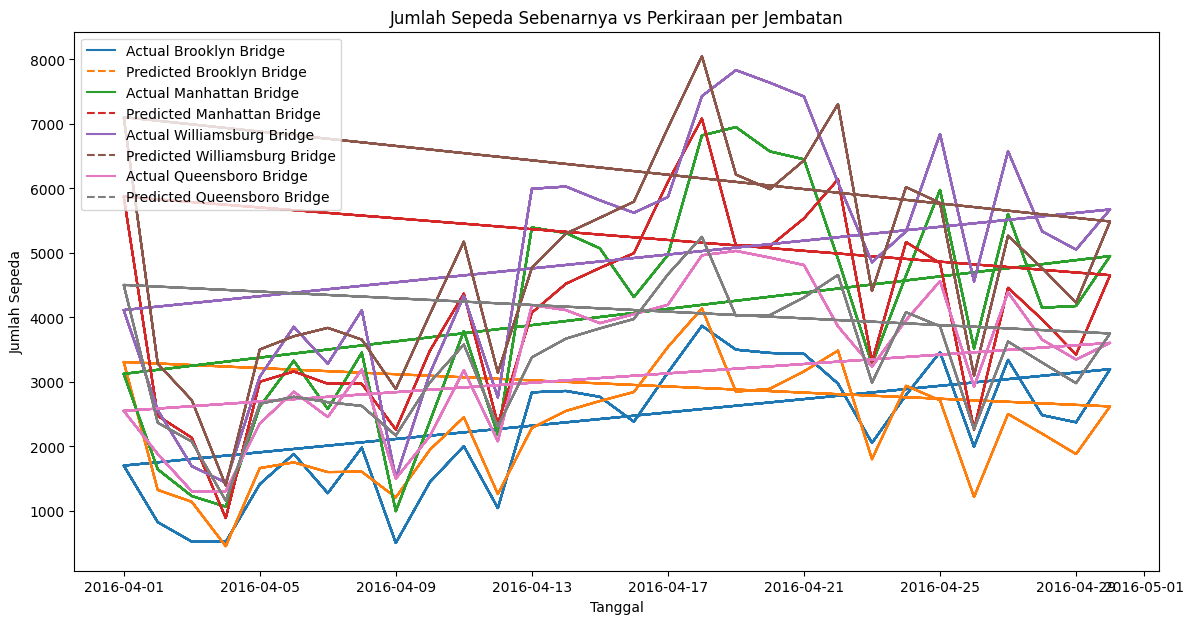

In [48]:
plt.figure(figsize=(14, 7))
for bridge, pred_column in zip(bridges, predicted_columns):
    plt.plot(data['Date'], data[bridge], label=f'Actual {bridge}')
    plt.plot(data['Date'], data[pred_column], label=f'Predicted {bridge}', linestyle='--')

plt.xlabel('Tanggal')
plt.ylabel('Jumlah Sepeda')
plt.title('Jumlah Sepeda Sebenarnya vs Perkiraan per Jembatan')
plt.legend()
plt.show()

##### [4.2] Scatter plot untuk hubungan antara fitur dan jumlah sepeda untuk setiap jembatan

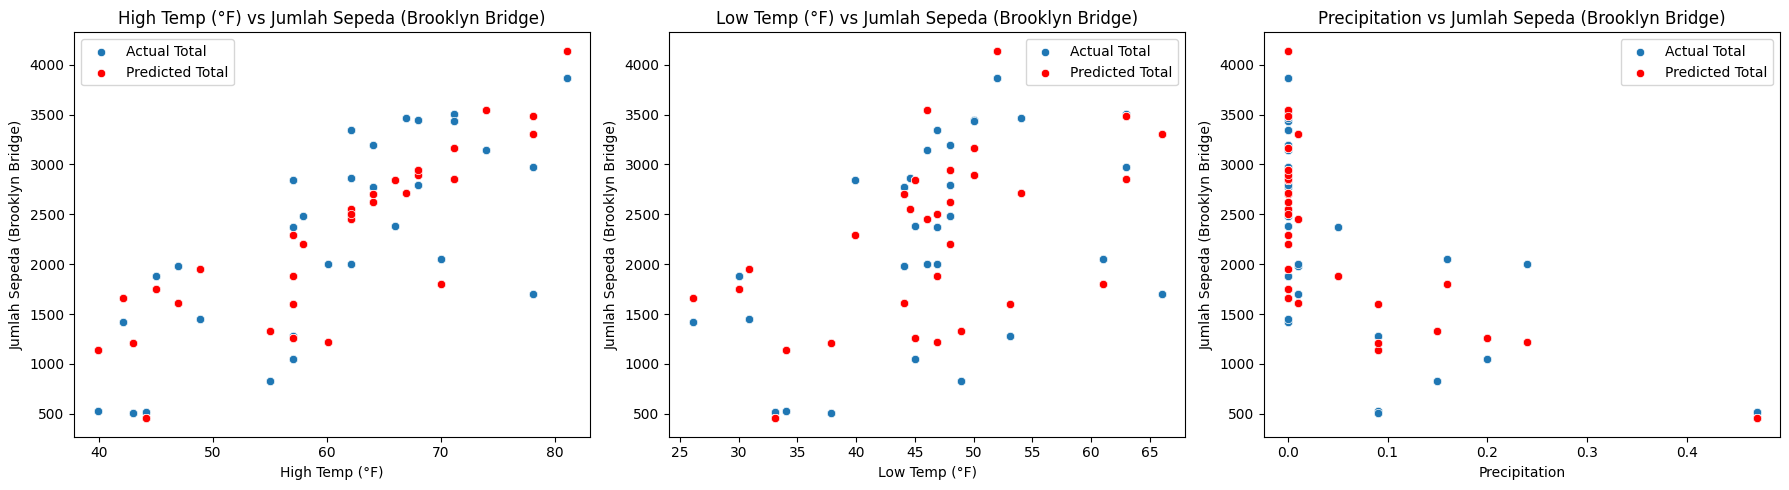

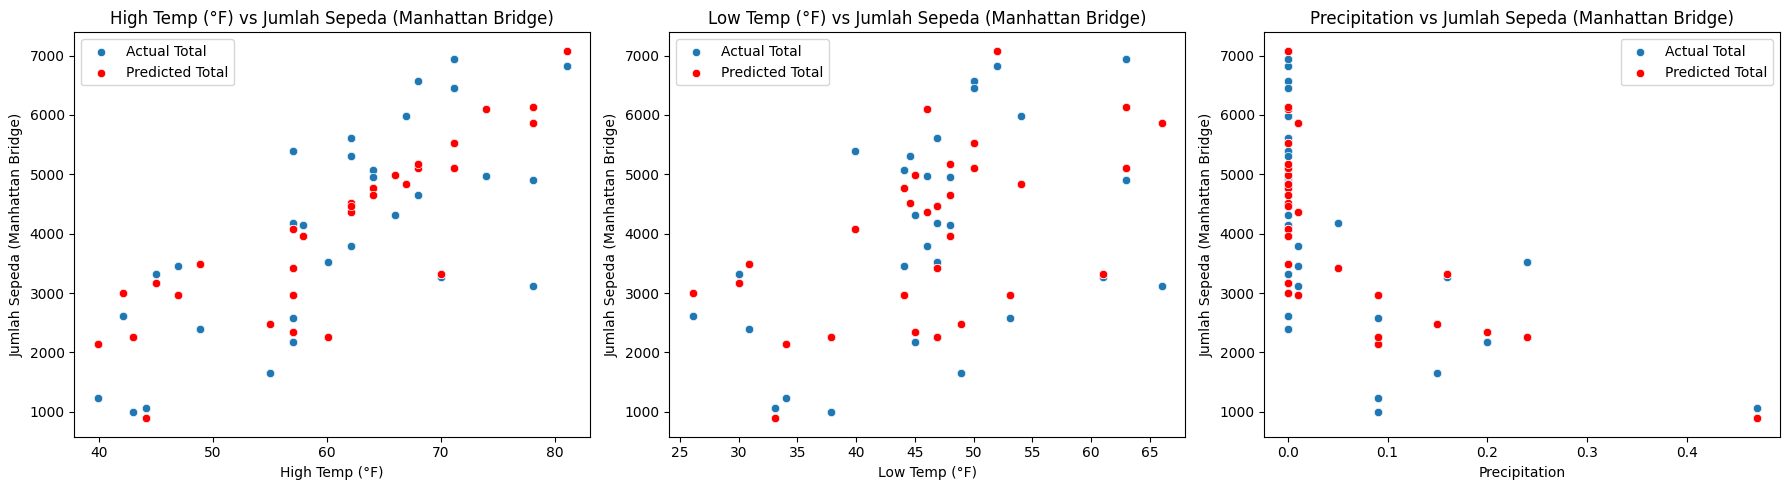

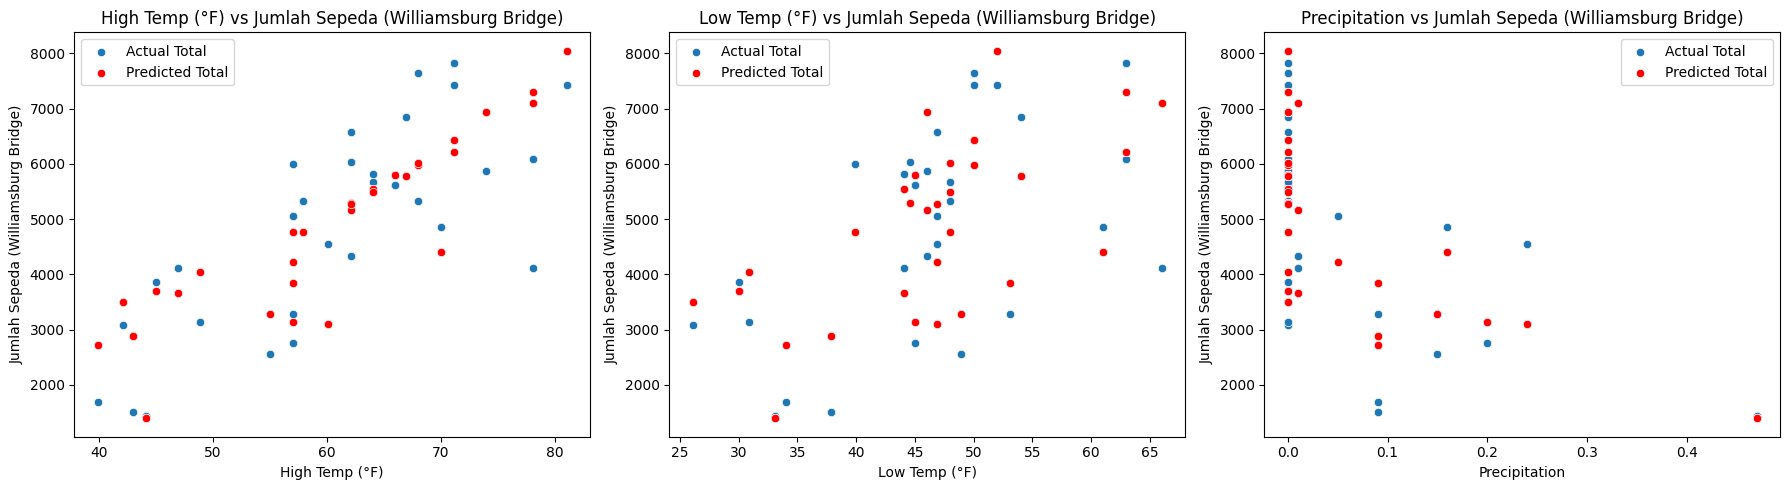

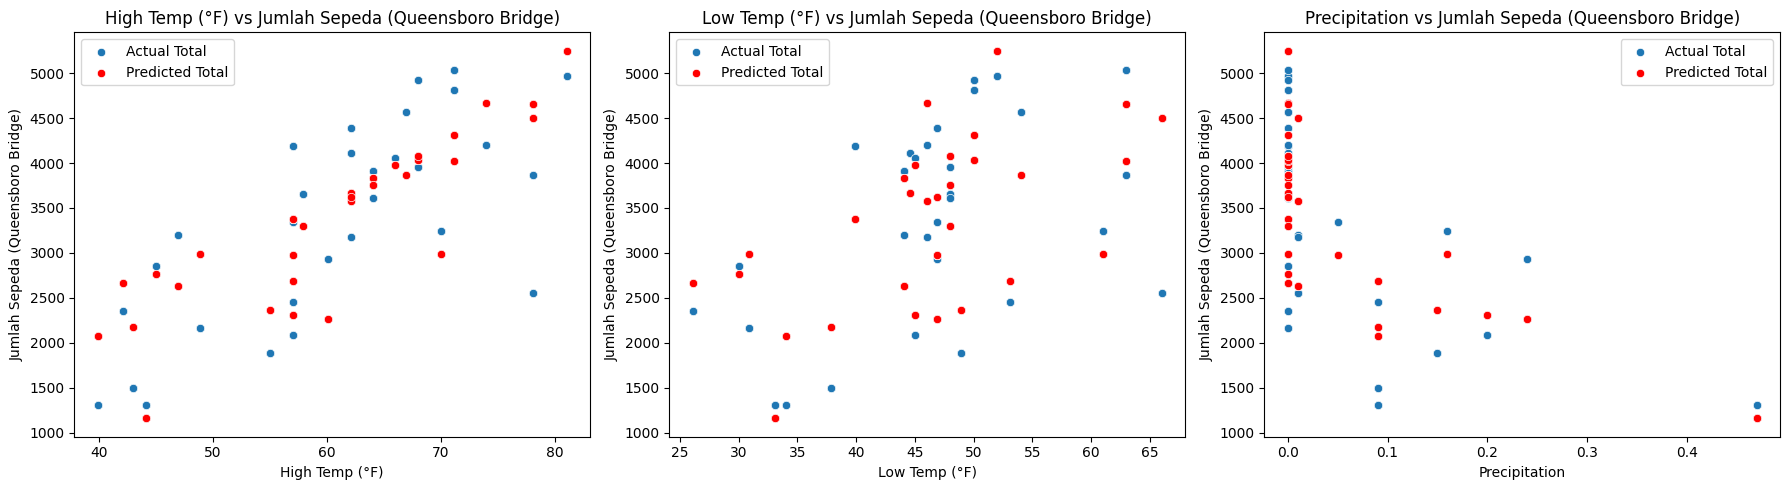

In [49]:
features = ['High Temp (°F)', 'Low Temp (°F)', 'Precipitation']
for bridge, pred_column in zip(bridges, predicted_columns):
    plt.figure(figsize=(18, 5))
    for i, feature in enumerate(features, 1):
        plt.subplot(1, 3, i)
        sns.scatterplot(x=data[feature], y=data[bridge], label='Actual Total')
        sns.scatterplot(x=data[feature], y=data[pred_column], label='Predicted Total', color='red')
        plt.xlabel(feature)
        plt.ylabel(f'Jumlah Sepeda ({bridge})')
        plt.title(f'{feature} vs Jumlah Sepeda ({bridge})')
        plt.legend()

    plt.tight_layout()
    plt.show()

#### [5] Analisis Tren Harian

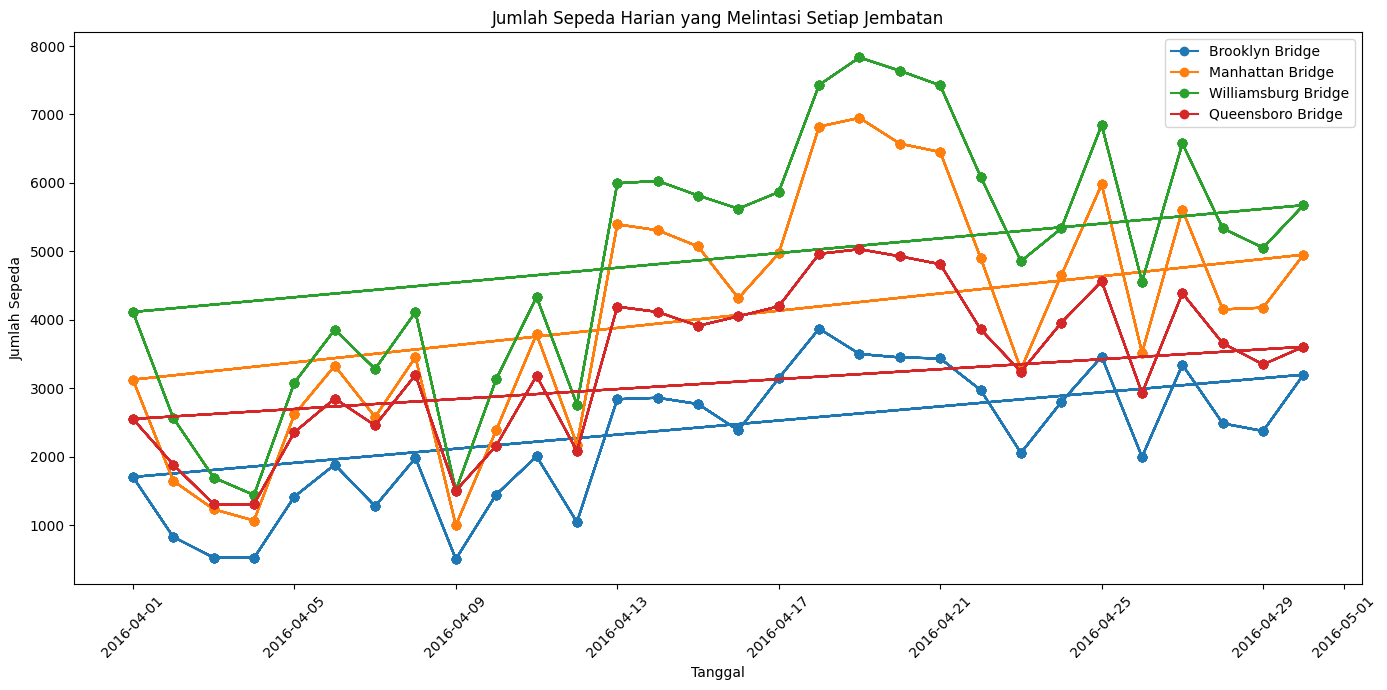

In [50]:
# Visualisasi tren harian
plt.figure(figsize=(14, 7))
for bridge in bridges:
    plt.plot(data['Date'], data[bridge], marker='o', label=bridge)

plt.xlabel('Tanggal')
plt.ylabel('Jumlah Sepeda')
plt.title('Jumlah Sepeda Harian yang Melintasi Setiap Jembatan')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### [6] Analisis Perbandingan Antar Jembatan

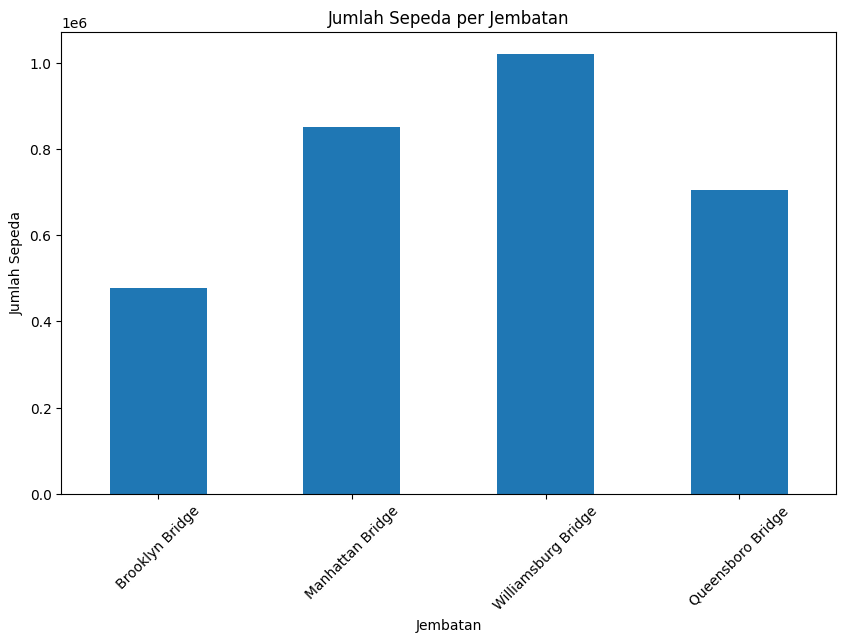

In [51]:
# Menghitung total jumlah sepeda per jembatan
total_bikes_per_bridge = data[bridges].sum()

# Visualisasi perbandingan jumlah sepeda per jembatan
plt.figure(figsize=(10, 6))
total_bikes_per_bridge.plot(kind='bar')
plt.xlabel('Jembatan')
plt.ylabel('Jumlah Sepeda')
plt.title('Jumlah Sepeda per Jembatan')
plt.xticks(rotation=45)
plt.show()

#### [7] Analisis Korelasi

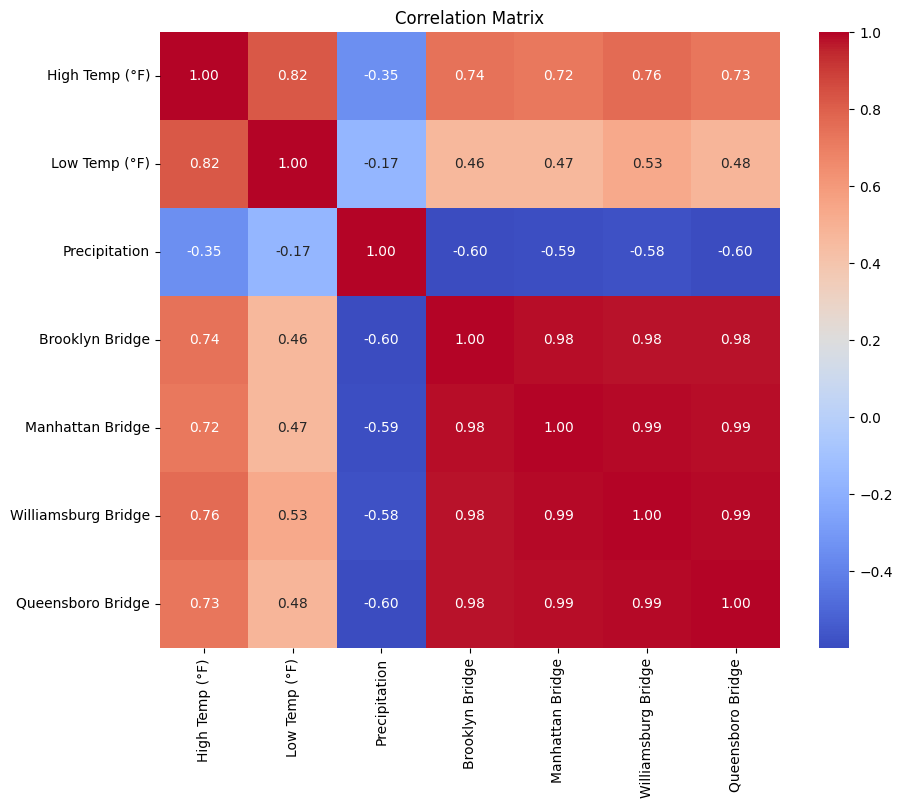

In [52]:
# Menghitung korelasi antara variabel cuaca dan jumlah sepeda
correlation_matrix = data[['High Temp (°F)', 'Low Temp (°F)', 'Precipitation'] + bridges].corr()

# Visualisasi matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#### [8] Clustering Hari Berdasarkan Penggunaan Sepeda

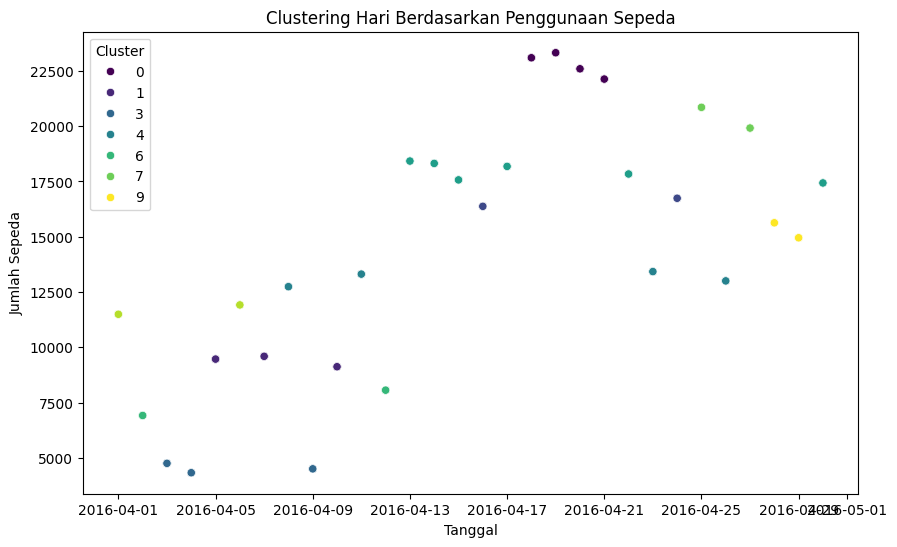

In [53]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Fitur untuk clustering (jumlah sepeda di setiap jembatan)
X_clustering = data[bridges]

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# Menjalankan K-Means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Date', y='Total', hue='Cluster', palette='viridis')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Sepeda')
plt.title('Clustering Hari Berdasarkan Penggunaan Sepeda')
plt.legend(title='Cluster')
plt.show()

#### [9] Analisis Outlier

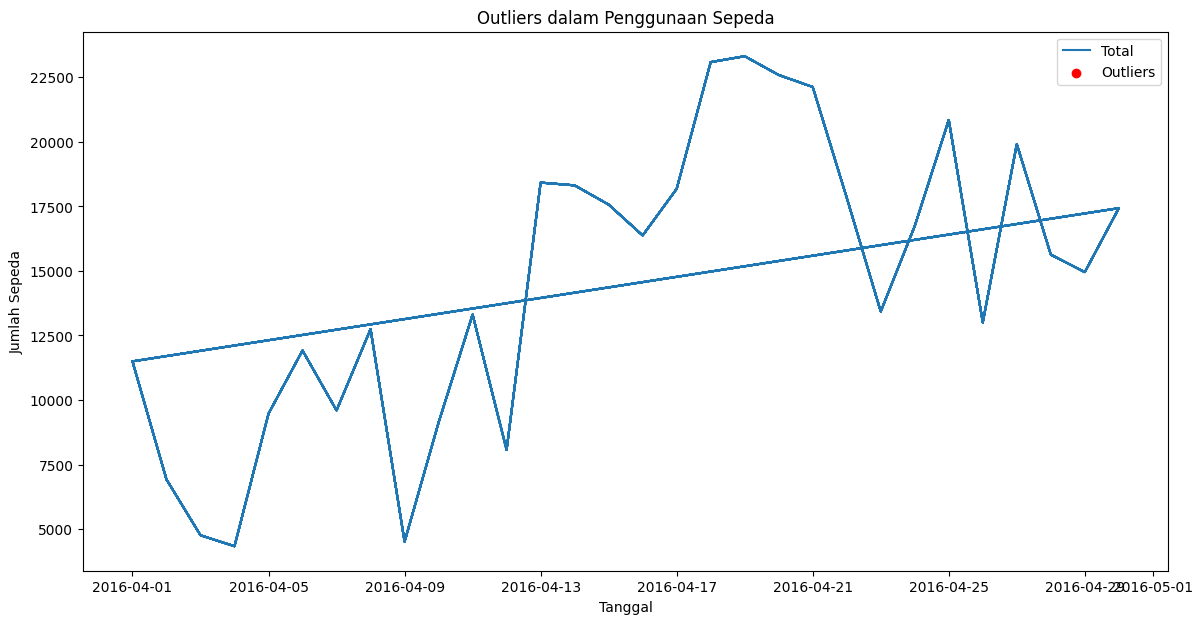

In [54]:
from scipy.stats import zscore

# Menghitung z-score untuk setiap jembatan
data['z_score_total'] = zscore(data['Total'])

# Mengidentifikasi outlier (misalnya, z-score lebih dari 3 atau kurang dari -3)
outliers = data[(data['z_score_total'] > 3) | (data['z_score_total'] < -3)]

# Visualisasi outlier
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Total'], label='Total')
plt.scatter(outliers['Date'], outliers['Total'], color='red', label='Outliers')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Sepeda')
plt.title('Outliers dalam Penggunaan Sepeda')
plt.legend()
plt.show()

## **Kesimpulan**

`Suhu Tertinggi dan Terendah`: Suhu memiliki pengaruh signifikan terhadap jumlah total sepeda yang melewati jembatan. Suhu tertinggi yang lebih tinggi terkait dengan peningkatan jumlah sepeda, sedangkan suhu terendah yang lebih rendah terkait dengan penurunan jumlah sepeda.

`Curah Hujan`: Curah hujan memiliki pengaruh yang sangat signifikan dan negatif terhadap jumlah total sepeda. Hari-hari dengan curah hujan yang lebih tinggi cenderung mengurangi jumlah sepeda yang melewati jembatan secara drastis.

`Signifikansi Model`: Semua variabel prediktor yang digunakan dalam model ini sangat signifikan dalam menjelaskan variabilitas jumlah sepeda harian. Model ini memiliki kecocokan yang sangat baik, ditunjukkan oleh nilai pseudo R-squared yang tinggi (1.000), yang mengindikasikan bahwa model sangat baik dalam memprediksi jumlah sepeda harian berdasarkan variabel cuaca.

**Hasil ini menunjukkan bahwa cuaca, terutama suhu dan curah hujan, memainkan peran penting dalam mempengaruhi jumlah sepeda yang digunakan di New York City setiap harinya.**